In [10]:
import numpy as np
import matplotlib.pyplot as plt

**Task 1**

In [11]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

import numpy as np

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        # write your code here.
        return np.random.uniform(mu - sigma/np.sqrt(3), mu + sigma/np.sqrt(3), n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))


# Creating y1 and y2
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [12]:
# Define the objective function
def objective_f1(x,y):
    x_v = np.ones(len(y))*x
    s = sum(np.square(x_v-y)) /2
    return s

# IGD, the ordering is permitted to have replacement. 
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)

    x = np.ndarray(n+1)
    x[0] = 0
    obj_f = np.ndarray(n)
    for k in range(n):
        gamma = 1/(k+1)
        x[k+1] = x[k] - gamma*(x[k]-y[ordering[k]])
        obj_f[k] = objective_f1(x[k+1],y) # objective function
    return x[-1], obj_f


# IGD, the ordering is not permitted to have replacement.
def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
   
    x = np.ndarray(n+1)
    x[0] = 0
    obj_f = np.ndarray(n)
    for k in range(n):
        gamma = 1/(k+1)
        x[k+1] = x[k] - gamma*(x[k]-y[ordering[k]])
        obj_f[k] = objective_f1(x[k+1],y) # objective function
    return x[-1], obj_f

Optimal Value
With-Replacement: 0.35
Without-Replacement: 0.45
With-Replacement: 0.42
Without-Replacement: 0.45


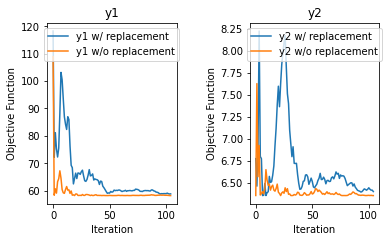

In [13]:
# Plot

xr1, hr1 = IGD_wr_task1(y1)
xo1, ho1 = IGD_wo_task1(y1)
xr2, hr2 = IGD_wr_task1(y2)
xo2, ho2 = IGD_wo_task1(y2)

print("Optimal Value")
print(f"With-Replacement: {xr1:.2f}")
print(f"Without-Replacement: {xo1:.2f}")
print(f"With-Replacement: {xr2:.2f}")
print(f"Without-Replacement: {xo2:.2f}")

figure_11 = plt.subplot(1,2,1)
plt.plot(hr1, label = "y1 w/ replacement")
plt.plot(ho1, label = "y1 w/o replacement")
plt.legend(loc=9)
plt.title("y1")
plt.xlabel("Iteration")
plt.ylabel("Objective Function")

figure_12 = plt.subplot(1,2,2)
plt.plot(hr2, label = "y2 w/ replacement")
plt.plot(ho2, label = "y2 w/o replacement")
plt.legend(loc=9)
plt.title("y2")
plt.xlabel("Iteration")
plt.ylabel("Objective Function")

plt.tight_layout(pad=3)
plt.show()

**Task 1 Results**\
From the plots of the two settings above, for a fixed vector $y$, the strategy of random ordering without replacement is better as it converges to a fixed value faster.

Given $x_0 = 0$ and $x_{k+1} = x_k-γ_k (x_k-y_{i_k})$ with $\gamma_k = \frac{1}{k+1}$. We have
\begin{align*}
x_1 &= x_0 + \frac{1}{1} y_{i_1} = y_{i_1}\\
x_2 &= x_1 + \frac{1}{2} (x_1 - y_{i_2}) = \frac{1}{2} (y_{i_1}+y_{i_2})\\
x_3 &= x_2 + \frac{1}{3} (x_2 - y_{i_3}) = \frac{1}{3} (y_{i_1}+y_{i_2}+y_{i_3})\\
x_4 &= x_3 + \frac{1}{4} (x_3 - y_{i_4}) = \frac{1}{4} (y_{i_1}+y_{i_2}+y_{i_3}+y_{i_1})\\
&\vdots\\
x_n &= \frac{1}{n} ∑_{j=1}^n y_{i_j} \quad\Longrightarrow\quad \mu_y
\end{align*}
Thus, ``IGD_wo_task1`` must converge to the true solution ($\mu_y$).

**Task 2**

In [14]:
# Define the objective function
def objective_f2(x,y,beta):
    s = sum(beta) * ((x-y)**2)/2
    return s

# IGD, the ordering is permitted to have replacement.
def IGD_wr_task2(y,beta):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    gamma = 0.95*min(np.ones(np.shape(beta))/beta)

    x = np.ndarray(n+1)
    x[0] = 0
    obj_f = np.ndarray(n)
    for k in range(n):
        x[k+1] = x[k] - gamma*beta[ordering[k]]*(x[k]-y)
        obj_f[k] = objective_f2(x[k+1],y,beta)
    return x[-1], obj_f
    # pass

# IGD, the ordering is not permitted to have replacement.
def IGD_wo_task2(y,beta):
    n = len(beta)
    ordering = np.random.choice(n, n, replace=False)
    gamma = 0.95*min(np.ones(np.shape(beta))/beta)

    x = np.ndarray(n+1)
    x[0] = 0
    obj_f = np.ndarray(n)
    for k in range(n):
        x[k+1] = x[k] - gamma*beta[ordering[k]]*(x[k]-y)
        obj_f[k] = objective_f2(x[k+1],y,beta)
    return x[-1], obj_f
    # pass

Optimal Value
With-Replacement: 1.00
Without-Replacement: 1.00


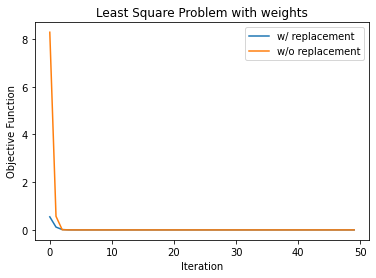

In [15]:
# Plot

# Define #iteration = n, weights = beta, and y values.
y = 1
n = 50
beta = np.random.uniform(1,2,n)

xr, hr = IGD_wr_task2(y,beta)
xo, ho = IGD_wo_task2(y,beta)

print("Optimal Value")
print(f"With-Replacement: {xr:.2f}")
print(f"Without-Replacement: {xo:.2f}")

figure_2 = plt.plot()
plt.plot(hr, label = "w/ replacement")
plt.plot(ho, label = "w/o replacement")
plt.legend()
plt.title("Least Square Problem with weights")
plt.xlabel("Iteration")
plt.ylabel("Objective Function")

plt.show()

**Task 2 Results**\
From the plot above, for a fixed value $y$, both strategies work approximately the same with respect to the same weights.

**Tesk 3**

In [16]:
# Generation of exact solution and data y and matrix A.
def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

# Generate the problem with 200x100 matrix. rho as 0.01.
A, xstar, y = generate_problem_task3(200, 100, 0.01)

In [17]:
# Define the objective function
def objective_f3(A,x,y):
    s = sum(np.square(A@x-y))
    return s

# IGD, the ordering is permitted to have replacement.
def IGD_wr_task3(y, A):
    m,n = A.shape
    ordering = np.random.choice(m, m, replace=True)
    gamma = 10**(-3)

    x = np.zeros((n,m+1))
    norm = obj_f = np.ndarray(m)
    for k in range(m):
        x[:,k+1] = x[:,k] - gamma*A[ordering[k]].T * (A[ordering[k]]@x[:,k]-y[ordering[k]])
        obj_f[k] = objective_f3(A,x[:,k+1],y) # objective function

        norm[k] = np.linalg.norm(x[:,k+1]-xstar,ord=2) # norm
    return x, obj_f, norm
    # pass

# IGD, the ordering is not permitted to have replacement.
def IGD_wo_task3(y, A):
    m,n = A.shape
    ordering = np.random.choice(m, m, replace=False)
    gamma = 10**(-3)

    x = np.zeros((n,m+1))
    norm = obj_f = np.ndarray(m)
    for k in range(m):
        x[:,k+1] = x[:,k] - gamma*A[ordering[k]].T * (A[ordering[k]]@x[:,k]-y[ordering[k]])
        obj_f[k] = objective_f3(A,x[:,k+1],y) # objective function

        norm[k] = np.linalg.norm(x[:,k+1]-xstar,ord=2) # norm
    return x, obj_f, norm
    # pass

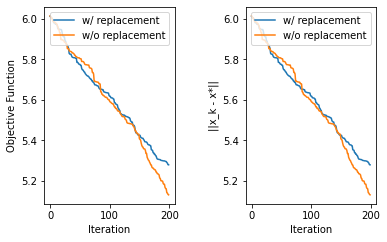

In [18]:
# Plot

xr, hr, nr = IGD_wr_task3(y,A)
xo, ho, no = IGD_wo_task3(y,A)

figure_31 = plt.subplot(1,2,1)
plt.plot(hr, label = "w/ replacement")
plt.plot(ho, label = "w/o replacement")
plt.legend(loc=9)
plt.xlabel("Iteration")
plt.ylabel("Objective Function")

figure_31 = plt.subplot(1,2,2)
plt.plot(nr, label = "w/ replacement")
plt.plot(no, label = "w/o replacement")
plt.legend(loc=9)
plt.xlabel("Iteration")
plt.ylabel("||x_k - x*||")

plt.tight_layout(pad=3)
plt.show()

**Task 3 Result**
From the plot above, the strategy of random ordering without replacement is better as the Error $||x_k-x^*||$ approaches 0 faster and is less than that of the strategy with replacement for most iterations.
